In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/ananyaghosh/Downloads/Datasets_Machine_Learning/loan.csv')
print(df.shape)
print(df.head())

/var/folders/2n/1pkt5_2x4vb20p09sr3tjc1r0000gn/T/ipykernel_6107/3279488426.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/ananyaghosh/Downloads/Datasets_Machine_Learning/loan.csv')


(887379, 74)
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade  ... total_bal_il il_util  \
0     10.65       162.87     B        B2  ...          NaN     NaN   
1     15.27        59.83     C        C4  ...          NaN     NaN   
2     15.96        84.33     C        C5  ...          NaN     NaN   
3     13.49       339.31     C        C1  ...          NaN     NaN   
4     12.69        67.79     B        B5  ...          NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN          

In [11]:
print(df.isnull().mean()*100)

id                   0.000000
member_id            0.000000
loan_amnt            0.000000
funded_amnt          0.000000
funded_amnt_inv      0.000000
                      ...    
all_util            97.591559
total_rev_hi_lim     7.919502
inq_fi              97.591559
total_cu_tl         97.591559
inq_last_12m        97.591559
Length: 74, dtype: float64


['annual_inc', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq']
13
        annual_inc                    title  delinq_2yrs earliest_cr_line  \
635064     78000.0       Debt consolidation          0.0         Sep-2008   
711926     60000.0       Debt consolidation          0.0         Nov-2000   
217326     65000.0            Pay off Bills          0.0         Jun-1994   
445094     41000.0  Credit card refinancing          0.0         Oct-2000   
345904    129500.0  Credit card refinancing          0.0         Jan-1985   

        inq_last_6mths  open_acc  pub_rec  revol_util  total_acc last_pymnt_d  \
635064             3.0      16.0      0.0        26.7       24.0     Nov-2015   
711926             0.0       6.0      0.0        38.1       21.0     Jan-2016   
217326             0.0      12.0      0.0        83.7       22.0     Jul-2014 

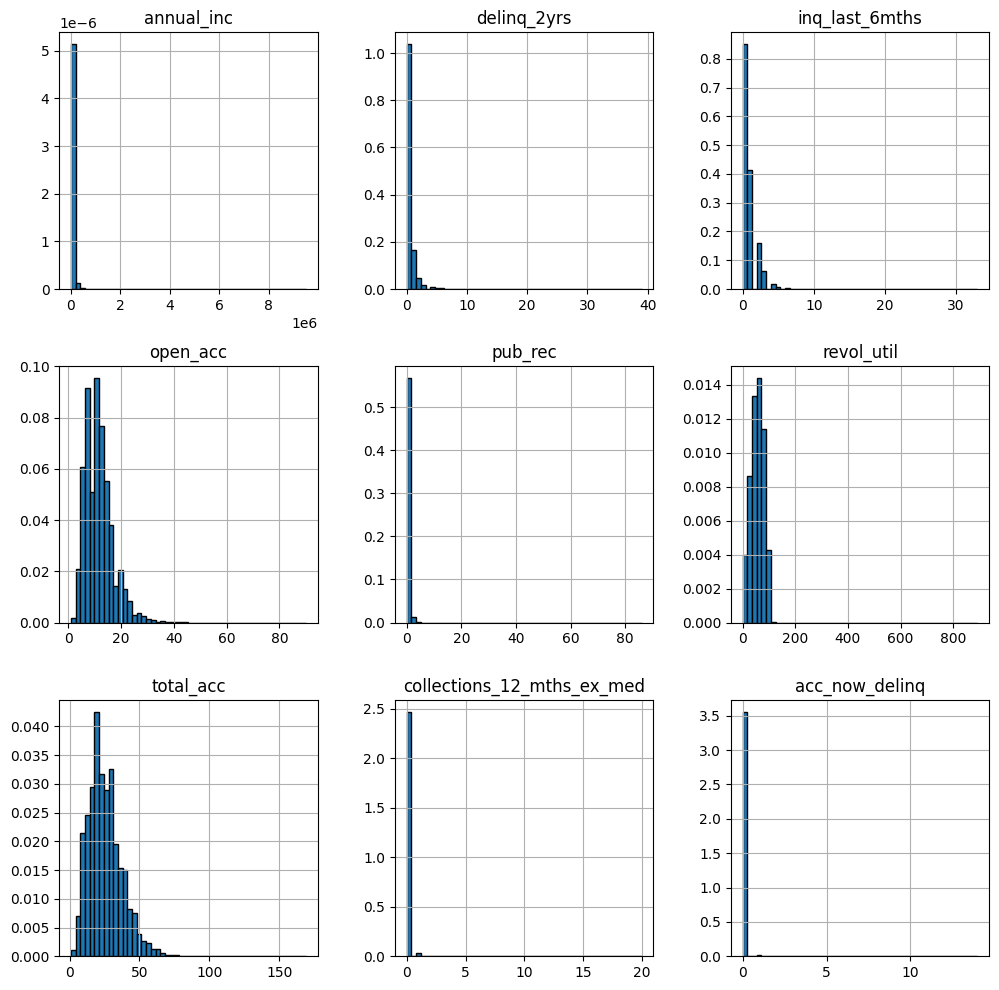

In [5]:
# print(df.isnull().mean()*100)

# Columns with less than 5% missing values
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
print(cols)
print(len(cols))

print(df[cols].sample(5))

# len(df[cols].dropna())/len(df)

# Create a new dataframe consisting of only filtered columns with <5% MV
new_df = df[cols].dropna()
print(new_df.shape)

new_df.hist(bins=50, density=True, figsize=(12, 12), edgecolor='black')
plt.show()

<Axes: >

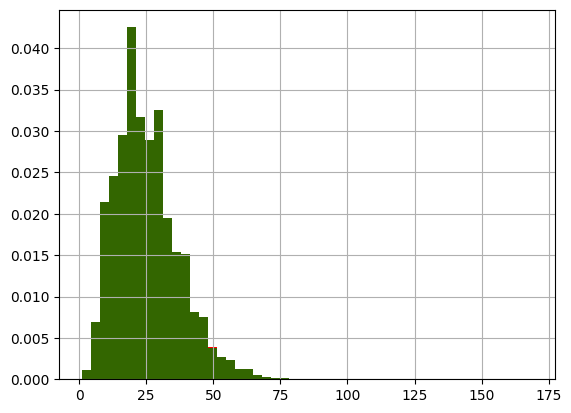

In [6]:
# Compare the 2 distributions of a column before and after cca

fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['total_acc'].hist(bins=50, ax=ax, density=True, color='red')

# after cca
new_df['total_acc'].hist(bins=50, ax=ax, density=True, color='green',alpha=0.8)


<Axes: ylabel='Density'>

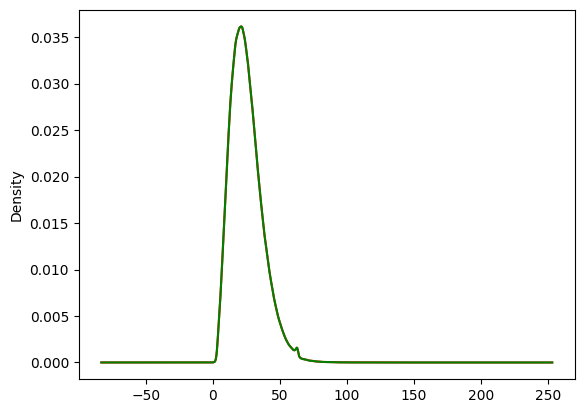

In [9]:
# Density plot
df['total_acc'].plot.density(color='red')
new_df['total_acc'].plot.density(color='green')

In [10]:
temp = pd.concat([
    
    # Percentage of observations per category of original data
    df['total_acc'].value_counts()/len(df),

    # Percentage of observations per category of new data
    new_df['total_acc'].value_counts()/len(new_df)
], axis=1)

temp.columns = ['original','cca']
temp

,original,cca
total_acc,,
22.0,0.036353,0.036386
20.0,0.036194,0.036178
21.0,0.036071,0.036061
19.0,0.035581,0.035605
23.0,0.035289,0.035276
...,...,...
121.0,0.000001,0.000001
119.0,0.000001,0.000001
156.0,0.000001,0.000001
